# Classifying Iris Species

In [4]:
import pyforest
import mglearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
print("Keys of isris_dataset: \n{}".format(iris_dataset.keys()))

Keys of isris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print(iris_dataset['DESCR'] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
print("target names: {}".format(iris_dataset['target_names']))

target names: ['setosa' 'versicolor' 'virginica']


In [8]:
print("feature names: \n{}".format(iris_dataset['feature_names']))

feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print("type of data: {}".format(type(iris_dataset['data'])))

type of data: <class 'numpy.ndarray'>


In [10]:
print("shape of data: {}".format(iris_dataset['data'].shape))

shape of data: (150, 4)


In [11]:
print("first five rows of data:\n{}".format(iris_dataset['data'][:5]))

first five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
print("type of data: {}".format(type(iris_dataset['data'])))

type of data: <class 'numpy.ndarray'>


In [13]:
print("shape of target: {}".format(iris_dataset['target'].shape))

shape of target: (150,)


In [14]:
print("target : \n{}".format(iris_dataset['target']))

target : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
# to build a machine learning model first we need to split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [16]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

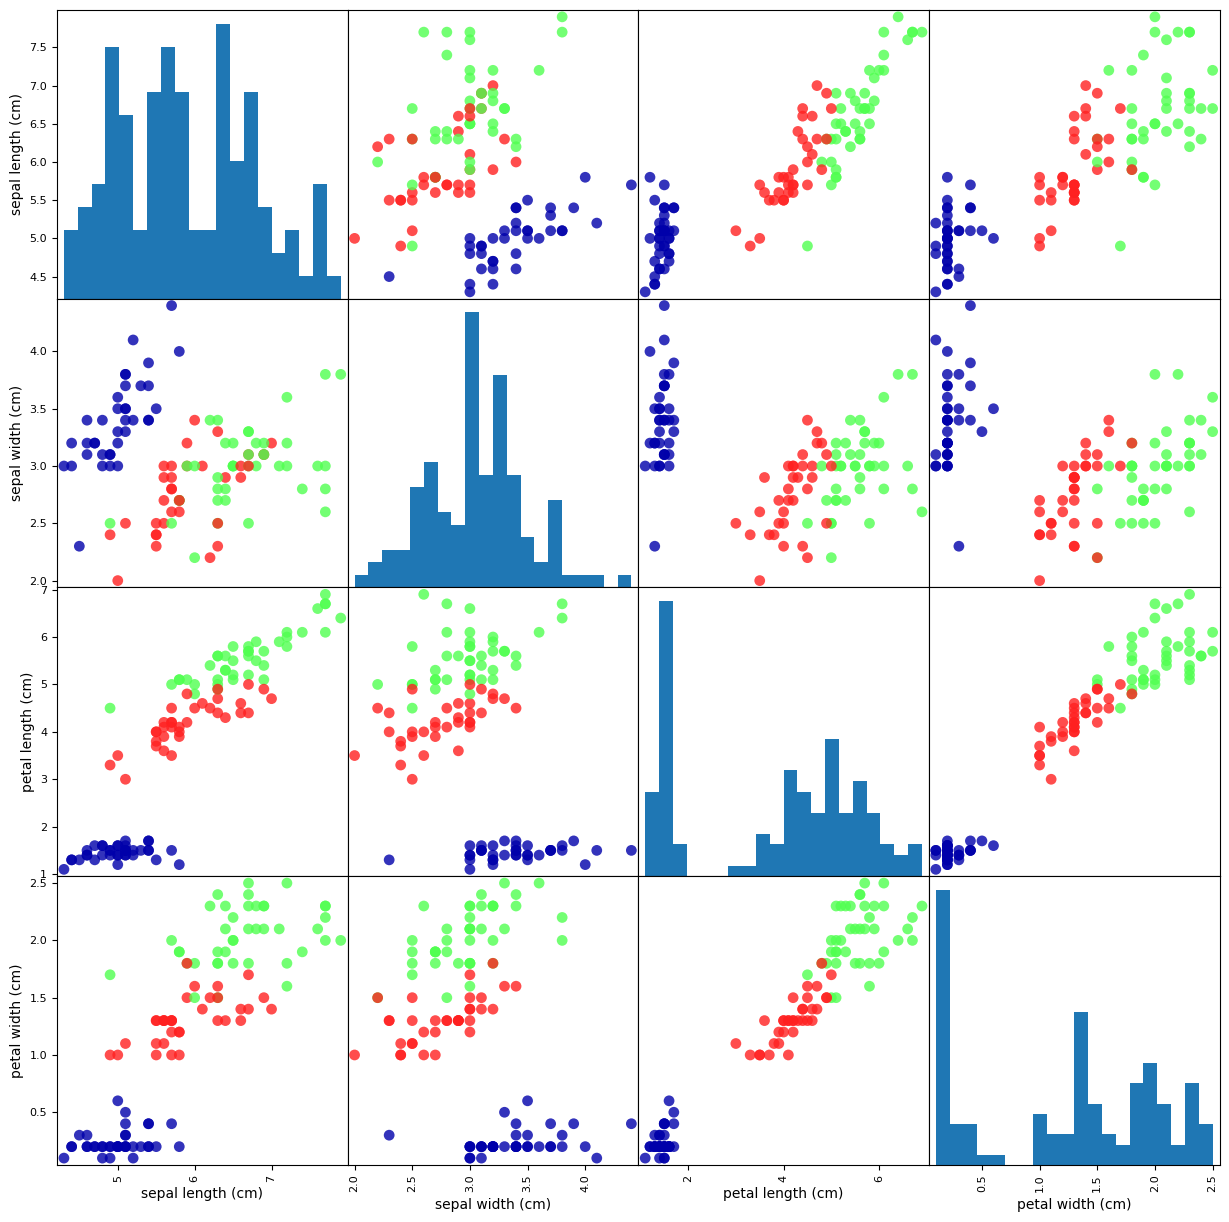

In [17]:
# we will plot the scatter matrix to understand the data better
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

In [18]:
# buildiong a k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

<IPython.core.display.Javascript object>

X_new.shape: (1, 4)


In [20]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))


Prediction: [0]
Predicted target name: ['setosa']


In [21]:
# our model predicts that this new iris belongs to class 0, meaning its species is setosa.

In [22]:
# evaluating the model
y_pred = knn.predict(X_test)
print("Test set predictions: \n{}".format(y_pred))

Test set predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [23]:
print("test set score: {:.2f}".format(np.mean(y_pred == y_test)))

<IPython.core.display.Javascript object>

test set score: 0.97


In [24]:
# we can also use the score method of the knn object
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [25]:
# for this model, the test accuracy is about 0.97, which means we made the right prediction for 97% of the iris in the test set.

# K-Nearest Neighbors

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

X.shape: (26, 2)


<IPython.core.display.Javascript object>

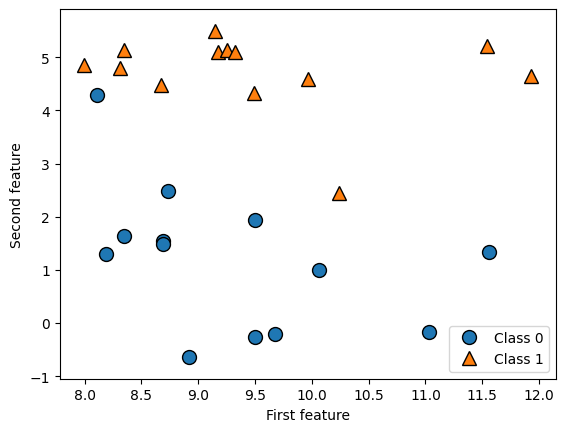

In [26]:
# we will use dataset of make_forge from mglearn
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
plt.show()

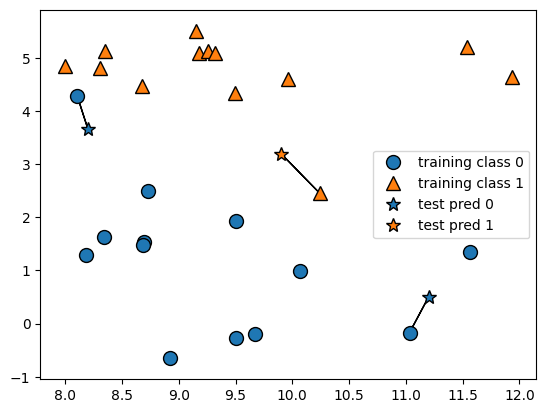

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

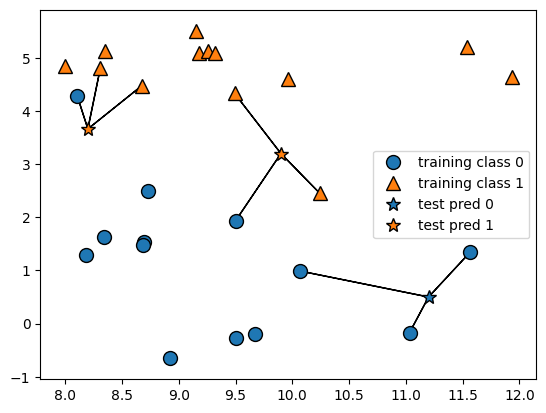

In [28]:
# instead considering only the closest point, we can consider the 3 closest points to classify a new point
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [29]:
# now we will evaluate the model on the test data
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
print("test set prediction : {}".format(clf.predict(X_test)))

test set prediction : [1 0 1 0 1 0 0]


In [32]:
print("test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

test set accuracy: 0.86


In [33]:
# we can see our model is about 0.86 accurate on the test data.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

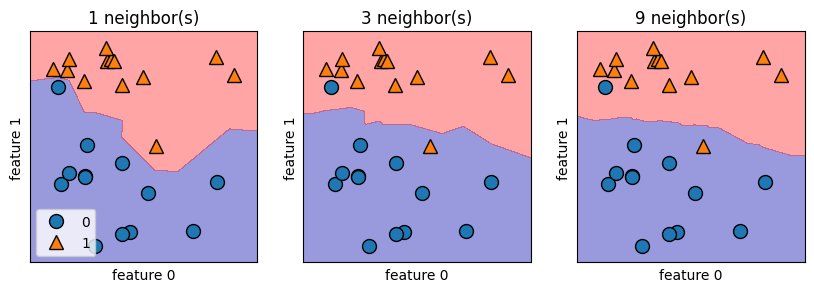

In [34]:
# Analysing the KNeighborsClassifier

fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

here we can see how the decision boundary changes as we change the number of neighbors used in the classification. With 1 neighbor, the decision boundary is very irregular, while with 9 neighbors, it is much smoother.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

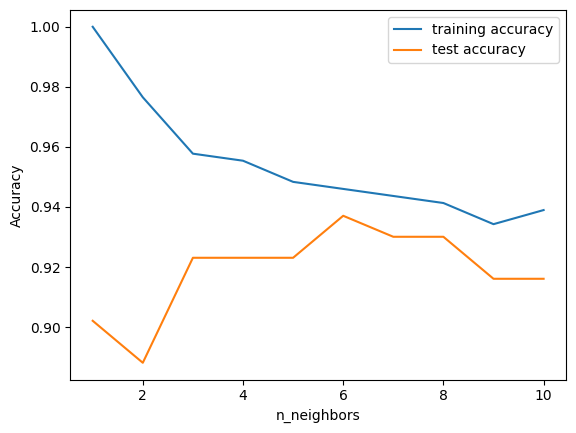

In [35]:
# now we will evaluate training and test set performance with different number of neighbors
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


we can see that with 1 neighbor the model is overfitting the data and as we increase the number of neighbors the model starts to generalize better. But after a certain point the model starts to underfit the data. So we need to choose the right number of neighbors to get the best performance from our model.

On the other hand, when considering 10 neighbors, the model that is too simple and performance is even worse. The best performance is somewhere in the middle, using around 6 neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

### K-Neighbors regression

there are also regression versions of the k-nearest neighbors algorithm. Instead of predicting the most common class among the neighbors, the regression version predicts the average of the target values of the neighbors.

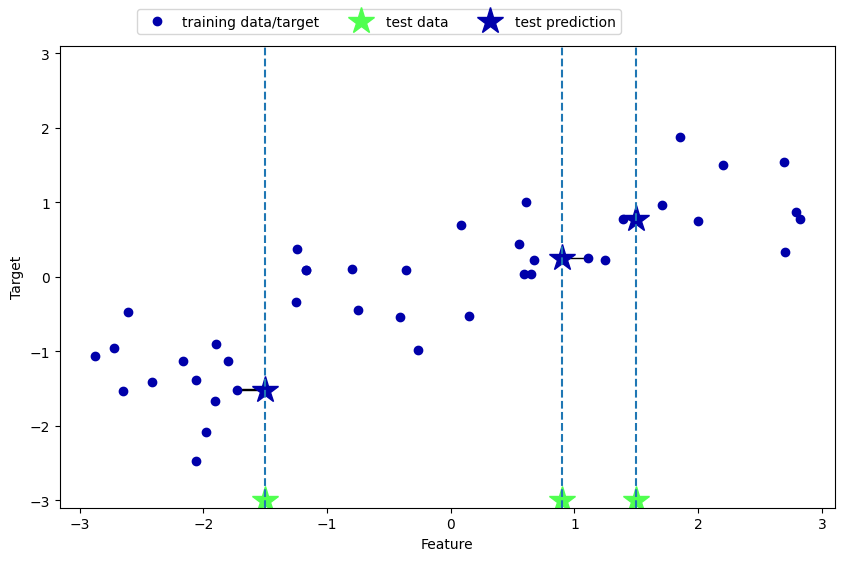

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

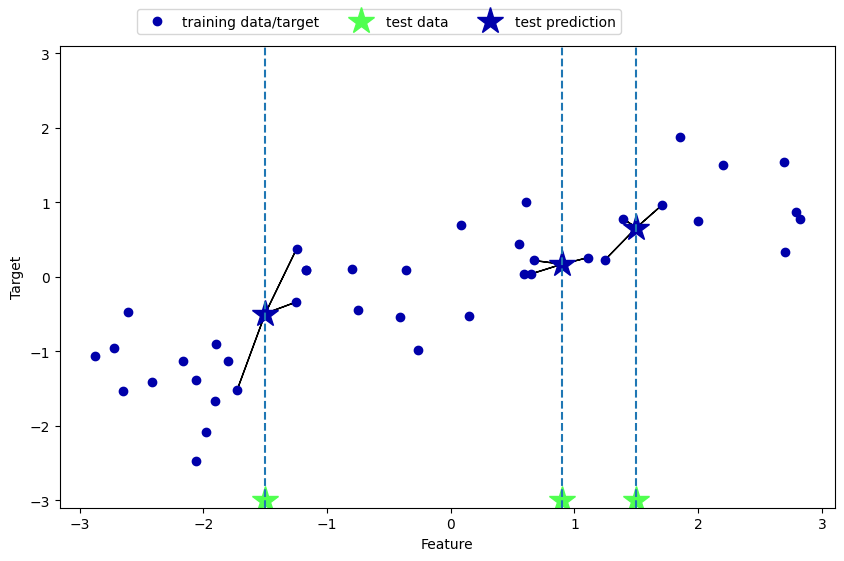

In [37]:
# we will use more than 1 neighbor
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training target
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [39]:
print("test set prediction: \n{}".format(reg.predict(X_test)))
print("test set true values: \n{}".format(y_test))
print(X_test)
print("Error: {}".format(reg.predict(X_test) - y_test))

test set prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test set true values: 
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
[[-1.24713211]
 [ 0.67111737]
 [ 1.71105577]
 [-2.06388816]
 [-2.87649303]
 [-1.89957294]
 [ 0.55448741]
 [ 2.81945911]
 [-0.40832989]
 [-2.72129752]]
Error: [-0.42695667  0.13907853  0.16976495 -0.5064205  -0.07901843 -0.72616394
 -0.07969779  0.13344994  0.09434153 -0.18229265]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

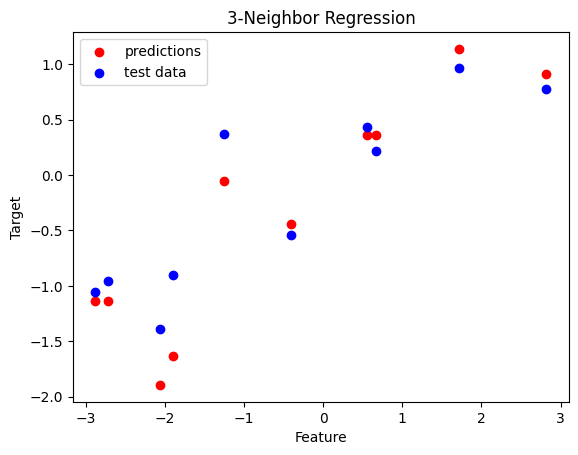

In [40]:
# plot the error model
plt.scatter(X_test, reg.predict(X_test), c='r', label='predictions')
plt.scatter(X_test, y_test, c='b', label='test data')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("3-Neighbor Regression")
plt.legend()
plt.show()

In [41]:
# we can also evaluate the model using the score method
print("test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

test set R^2: 0.83


In [42]:
# here, the score is about 0.83, meaning our model explains 83% of the variance in the data.

### Analysing KNeighborsRegressor

for our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the x_axis, which corresponds t the single feature.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

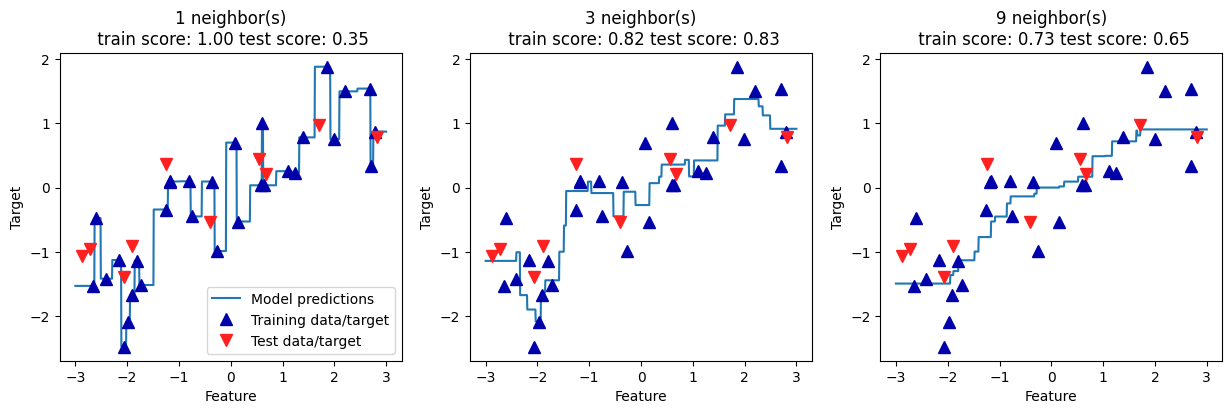

In [43]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()  

as we can see, the model with 1 neighbor perfectly fits the training data, but does not generalize well to the test data. The model with 3 neighbors is a bit less accurate on the training data, but more accurate on the test data. The model with 9 neighbors has even lower accuracy on both training and test data. This is because with more neighbors, the model becomes less flexible and cannot capture the underlying pattern in the data as well.

# Linear Regression

Linear regression finds the parameters _w_ and _b_ that minimize the mean squared error between predictions and the true regression targets y on the training set.

In [44]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_)) # slope of the line w
print("lr.intercept_: {}".format(lr.intercept_)) # y-intercept of the line b

<IPython.core.display.Javascript object>

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


Here ___intercept\____ attribuite is always a single float number, while the ___coef\____ attribute is a NumPy array with one entry per input feature. 

In [45]:
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

training set score: 0.67
test set score: 0.66


An $R^2$ of around 0.66 is not very good, but we can see that the score on the training and test sets are very close together. This means we are likely underfitting. 

In [46]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

<IPython.core.display.Javascript object>

training set score: 0.95
test set score: 0.61


The discrepency between performance on the training set and the test set is clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity.

## Ridge Regression

This is also linear model for regression. 
Regularization means explicitly restricting a model to avoid overfitting. The perticular kind used by redge regression is known as L2 regression. 

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

training set score: 0.89
test set score: 0.75


As we can see here the training set score of Ridge is lower than for LinearRegression, while the test score is higher.

In this above example we used default parmeter alpha = 1.0. There is no reason why this will give us the best trde-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coeffiecient to move towards zero, which decreases training set performance but might help generalization.  

In [48]:
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

training set score: 0.79
test set score: 0.64


In [49]:
ridge01 = Ridge(alpha=0.1)
ridge01.fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

training set score: 0.93
test set score: 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

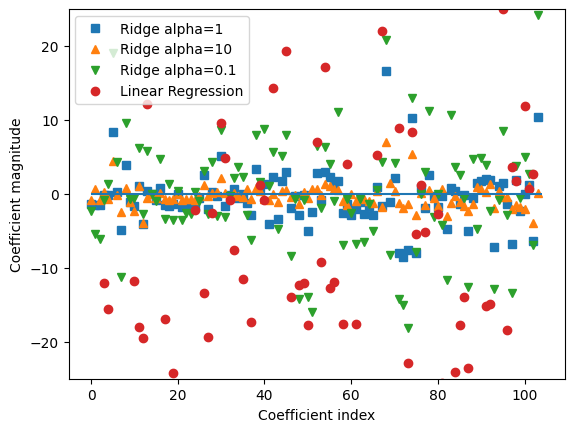

In [50]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

## Lasso

An alterntive to Ridge for regularizing linear regression in Lasso. As with ridge regression, using the lasso also restrict coefficient to be close to zero, but in a slightly different way, called L1 regularization.

In [51]:
from sklearn.linear_model import Lasso 
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

lasso = Lasso()
lasso.fit(X_train, y_train)
print("trainin set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("number of features used: {}".format(np.sum(lasso.coef_ != 0)))

trainin set score: 0.29
test set score: 0.21


<IPython.core.display.Javascript object>

number of features used: 4


As we can see, Lasso does quite badly, both on the training and test sets. This indicates that we are underfitting, and we find that is used only 4 of the 105 features. Similrly to Ridge, we can increase the number of features used by decreasing alpha. Setting alpha to a very small value, such as 0.01, will result in a model similar to ordinary linear regression, using most of the features and likely overfitting the training data.

In [52]:
lasso001 = Lasso(alpha=0.01, max_iter=10000)
lasso001.fit(X_train, y_train)
print("trainin set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

trainin set score: 0.90
test set score: 0.77


<IPython.core.display.Javascript object>

number of features used: 33


In [53]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000)
lasso00001.fit(X_train, y_train)
print("trainin set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

trainin set score: 0.95
test set score: 0.64


<IPython.core.display.Javascript object>

number of features used: 96


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

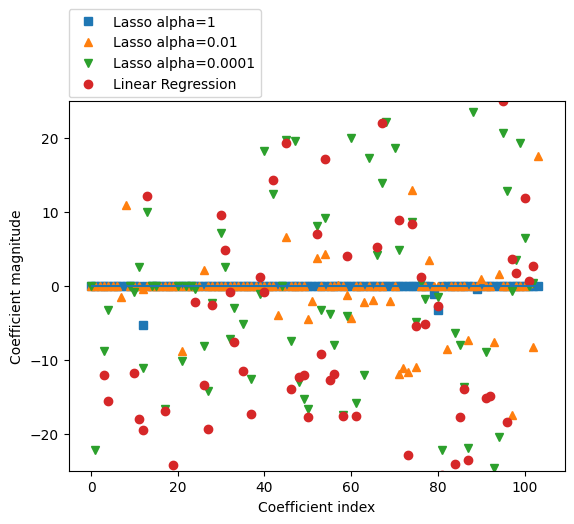

In [54]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=1, loc=(0, 1.01))
plt.show()

In practice ridge is often a better default choice than lasso. However, if we have large amount of features and expect only a few of them to be important, Lasso might be better choice.

## Elastic Net

elastic net is a linear regression model trained with both L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.

In [55]:

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic_net.score(X_train, y_train)))
print("test set score: {:.2f}".format(elastic_net.score(X_test, y_test)))
print("number of features used: {}".format(np.sum(elastic_net.coef_ != 0))) 

training set score: 0.33
test set score: 0.22


<IPython.core.display.Javascript object>

number of features used: 38


In [56]:
elastic_net_01 = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_01.fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic_net_01.score(X_train, y_train)))
print("test set score: {:.2f}".format(elastic_net_01.score(X_test, y_test)))
print("number of features used: {}".format(np.sum(elastic_net_01.coef_ != 0)))

training set score: 0.86
test set score: 0.72


<IPython.core.display.Javascript object>

number of features used: 84


## Linear model for classification

For liear model for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyper-plane. 

Two most common linear classification algorithms are ___Logistic regression___, implimented in `linear_model.LogisticRegresson`, and ___Linear Support Vector Machines___ (Linear SVMs), implimented in `svm.LinearSVC` (SVC stands for Support Vector Classifier)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

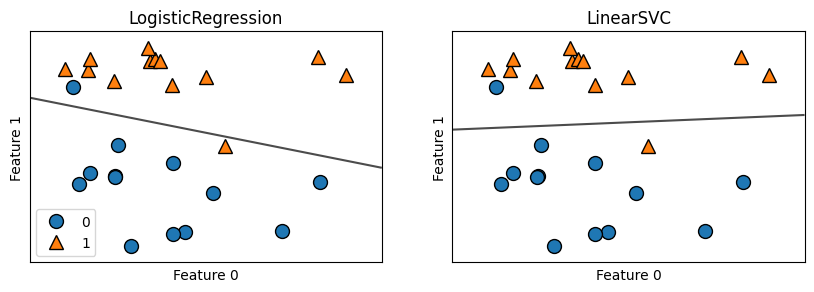

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
plt.show()

The two model come up wit same dicision boundaries. Note that both misclassify two of the points. By default, both models apply an L2 regulrization, in the way that Ridge does for regression.

For LogisticRegression and LinearSVC te tradeoff parameter that determines the strength of the regularization is called __c__, and higher value of __c__ corresponds to less regularization. In other words, when we use a high value for the parameter __c__, LogisticRegresison and LinearSVC try to fit the training set as best as poossible, while with the low values of the parameter __c__, the model put more emphasis on finding a coefficient vector (w) that is close to zero.

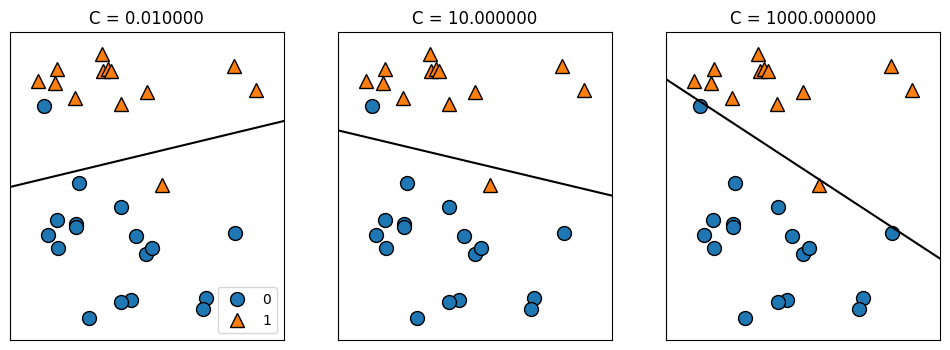

In [58]:
mglearn.plots.plot_linear_svc_regularization()

In [59]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.951


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.965


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

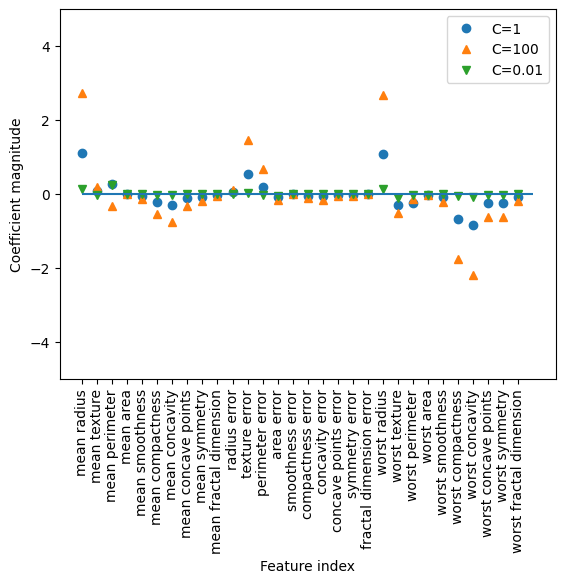

In [62]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

In [63]:
logreg.coef_

array([[ 1.11731646,  0.07113465,  0.26351121, -0.00850831, -0.04629912,
        -0.20723813, -0.29001471, -0.12043999, -0.07397498, -0.01552894,
         0.04305163,  0.54253324,  0.18712869, -0.08678208, -0.00439826,
        -0.04559056, -0.06454824, -0.01599387, -0.0182656 , -0.00408712,
         1.09683007, -0.28524937, -0.24480171, -0.02210803, -0.08353306,
        -0.67506525, -0.84341621, -0.24029744, -0.23010227, -0.066835  ]])

In [64]:
logreg001.coef_

array([[ 0.12367854, -0.01374868,  0.2450368 ,  0.00360973, -0.00263501,
        -0.01561437, -0.02239301, -0.0090108 , -0.00424395, -0.00074042,
         0.0035509 ,  0.03554795, -0.01277497, -0.04585474, -0.00030205,
        -0.00382074, -0.0052052 , -0.00126267, -0.00109417, -0.00030274,
         0.12416937, -0.09839821, -0.03610932, -0.025122  , -0.0053371 ,
        -0.05429899, -0.06749448, -0.01873396, -0.0151815 , -0.00472486]])

In [65]:
logreg100.coef_

array([[ 2.74002646,  0.17731356, -0.33159777,  0.01029935, -0.12541013,
        -0.54237116, -0.75626267, -0.31550951, -0.1998212 , -0.04268312,
         0.11498497,  1.45007871,  0.67513532, -0.17250586, -0.01156332,
        -0.11719254, -0.16656285, -0.04122566, -0.04910086, -0.01065632,
         2.68127739, -0.50950646, -0.12514911, -0.03843419, -0.22368249,
        -1.75057294, -2.18648525, -0.62531547, -0.61250774, -0.1765089 ]])

If we desire a more interpretable model, using L1 regularization might help, as it limits its the model to using only a few features.

Training accuracy of l1 logreg with C = 0.001: 0.913
Test accuracy of l1 logreg with C = 0.001: 0.923


<IPython.core.display.Javascript object>

Number of features used by l1 logreg with C = 0.001: 3


<IPython.core.display.Javascript object>

Training accuracy of l1 logreg with C = 1: 0.960
Test accuracy of l1 logreg with C = 1: 0.958


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<IPython.core.display.Javascript object>

Number of features used by l1 logreg with C = 1: 11


<IPython.core.display.Javascript object>

Training accuracy of l1 logreg with C = 100: 0.986
Test accuracy of l1 logreg with C = 100: 0.979


<IPython.core.display.Javascript object>

Number of features used by l1 logreg with C = 100: 23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

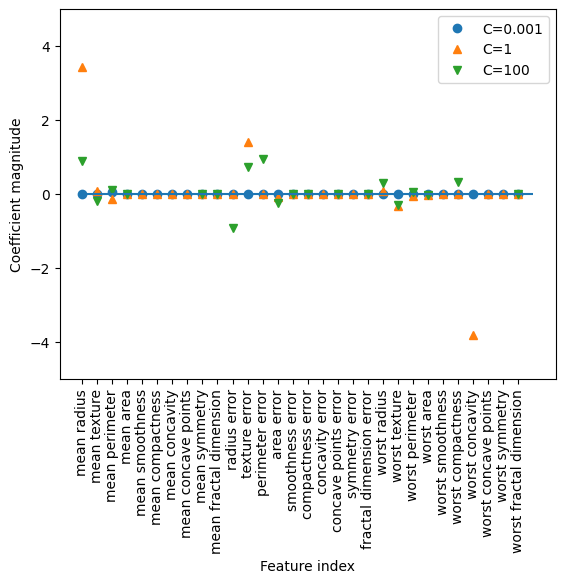

In [66]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C = {}: {:.3f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C = {}: {:.3f}".format(C, lr_l1.score(X_test, y_test)))
    print("Number of features used by l1 logreg with C = {}: {}".format(C, np.sum(lr_l1.coef_ != 0)))
    plt.plot(lr_l1.coef_.T, marker, label="C={}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend()
plt.show()

## Linear Model for Multiclass classification

Many linear classification models are for binary classification only, and dont extend naturally to the multiclass case( with the excception of logistic regression ). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the __one-vs-rest__ approach. In the __one-vs-rest__ approach, a binary model is learned for each class that tries to seperate that class from all of the other classes, resulting in as many binary models as there are classes.  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

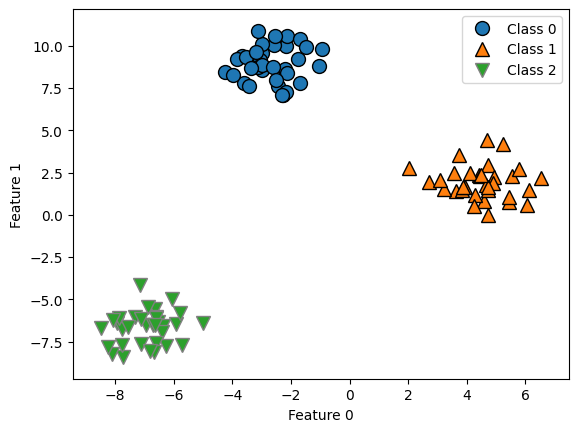

In [67]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [68]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

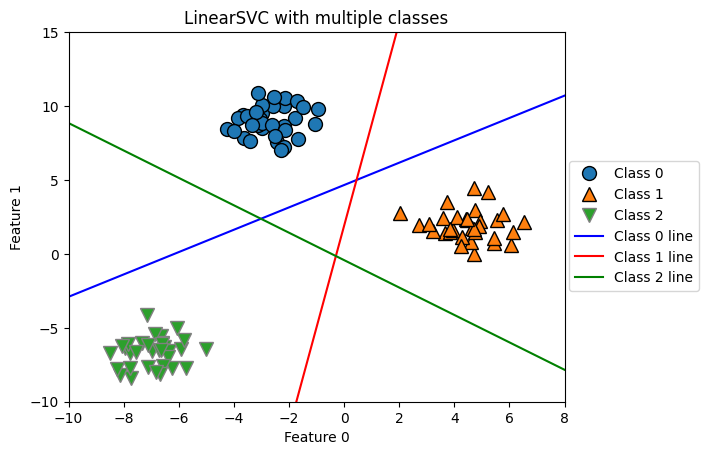

In [69]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 line", "Class 1 line", "Class 2 line"], loc=(1.01, 0.3))
plt.title("LinearSVC with multiple classes")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

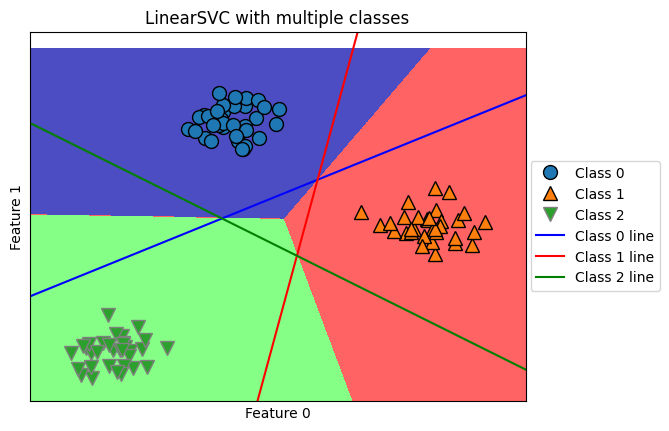

In [70]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 line", "Class 1 line", "Class 2 line"], loc=(1.01, 0.3))
plt.title("LinearSVC with multiple classes")
plt.show()

In [82]:
logistic_svm = LogisticRegression().fit(X, y)
print("Coefficient shape: ", logistic_svm.coef_.shape)
print("Intercept shape: ", logistic_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

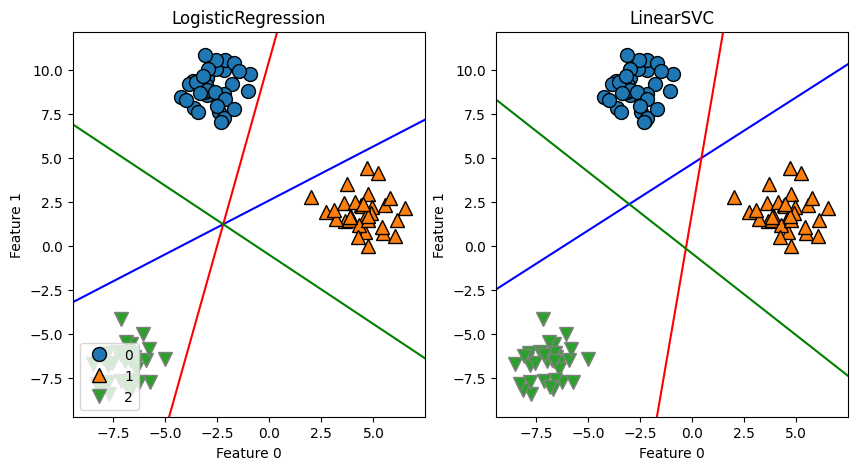

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    for coef, intercept, color in zip(clf.coef_, clf.intercept_, ['b', 'r', 'g']):
        ax.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
plt.show()

In [91]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))


Training set accuracy: 1.000
Test set accuracy: 0.937


In [92]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Training set accuracy: 0.988
Test set accuracy: 0.951


In [47]:
s = "paper"
t = 'ttile'
if len(set(s)) != len(set(t)):
    print("No")
else:
    d = {}
    for i in range(len(s)):
        d.setdefault(s[i], set()).add(t[i])
    print(d)

{'p': {'t', 'i'}, 'a': {'t'}, 'e': {'l'}, 'r': {'e'}}


In [70]:
n = [99,99]
k = 2


d = {}
for i in range(len(n)):
    d.setdefault(n[i], []).append(i)
print(d)
for key, value in d.items():
    if len(value) > 1:
        a = set()
        for i in value:
            if abs(k - i) in a:
                print("Yes")
                break
            a.add(i)

    

{99: [0, 1]}
